In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from lacbox.io import load_stats
from Assignment_4.code.helper_functions import extract_and_order_statistics, propability_wsp, calculate_AEP_per_wsp

# Constants
SEEDS = 6
JIM_PATH = 'Jim_Turb_stats.csv'  # path to mean steady stats
DTU_PATH = Path.cwd().parent.parent / 'Assignment_4' / 'dtu_10MW/turb/dtu_10mw_turb_stats.hdf5'  # path to mean steady stats
BB_SUBFOLDER = 'tcb'
DTU_SUBFOLDER = 'tcb'

# Dict to identify which HAWC2 descriptions correspond to which channels
CHAN_DESCS = {'BldPit': 'pitch1 angle',
              'RotSpd': 'rotor speed',
              'Thrust': 'aero rotor thrust',
              'GenTrq': 'generator torque',
              'ElPow': 'pelec',
              'TbFA': 'momentmx mbdy:tower nodenr:   1',
              'TbSS': 'momentmy mbdy:tower nodenr:   1',
              'YbTilt': 'momentmx mbdy:tower nodenr:  11',
              'YbRoll': 'momentmy mbdy:tower nodenr:  11',
              'ShftTrs': 'momentmz mbdy:shaft nodenr:   4',
              'OoPBRM': 'momentmx mbdy:blade1 nodenr:   1 coo: hub1',
              'IPBRM': 'momentmy mbdy:blade1 nodenr:   1 coo: hub1',
              'FlpBRM': 'momentmx mbdy:blade1 nodenr:   1 coo: blade1',
              'EdgBRM': 'momentmy mbdy:blade1 nodenr:   1 coo: blade1',
              'OoPHub': 'momentmx mbdy:hub1 nodenr:   1 coo: hub1',
              'IPHub': 'momentmy mbdy:hub1 nodenr:   1 coo: hub1',
              }

# Fancy Plots

In [13]:
import matplotlib
import scienceplots

matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use(['science'])

# Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'normal'

# DTU

In [14]:
# load the data from the stats file
df_DTU, wsps_DTU = load_stats(DTU_PATH, subfolder=DTU_SUBFOLDER, statstype='turb')

# isolate the channel data and get statistics
chan_df_DTU = df_DTU.filter_channel(chan_id='ElPow', chan_desc_dict=CHAN_DESCS)

# extract and order statistics
_, lines_DTU = extract_and_order_statistics(wsps_DTU, chan_df_DTU, SEEDS)

# Define wind class to match above (IA or IIIB)
wind_class_DTU = 'I' if DTU_SUBFOLDER == 'tca' else 'III'
P_wsp_DTU = propability_wsp(wsps_DTU, wind_class_DTU)

# Calculate AEP
AEP_per_wsp_DTU = calculate_AEP_per_wsp(lines_DTU['mean'], P_wsp_DTU)
print(f'DTU at "{DTU_SUBFOLDER}" has AEP={np.sum(AEP_per_wsp_DTU):.3f} GWh')

DTU at "tcb" has AEP=33.947 GWh


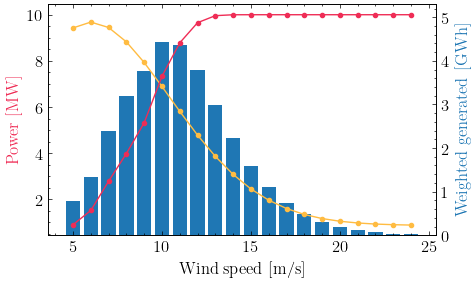

In [15]:
# Initialize the figure
fig, ax1 = plt.subplots(figsize=(5, 3))

# Plot Power on the primary y-axis (left)
line_1, = ax1.plot(wsps_DTU, lines_DTU['mean']/1E6, '-o', color='#EF2D56', label='Power curve', markersize=3)
ax1.set_xlabel('Wind speed [m/s]')
ax1.set_ylabel('Power [MW]', color='#EF2D56')

# Plot AEP on the right
ax2 = ax1.twinx()
line_2 = ax2.bar(wsps_DTU, AEP_per_wsp_DTU, color='tab:blue', label='Weighted power')
ax2.set_ylabel('Weighted generated [GWh]', color='tab:blue')
ax2.set_ylim(top=5.3)

# Plot wind probabilities
ax3 = ax1.twinx()
line_3, = ax3.plot(wsps_DTU, P_wsp_DTU, '-o', color='#FFBC42', label='Bin probabilities', markersize=3)
ax3.get_yaxis().set_visible(False)
ax3.set_ylim(top=0.11)

# Collect handles and labels for the legend
handles = [line_2, line_3, line_1]
labels = [h.get_label() for h in handles]

# Add a combined legend
# fig.legend(handles, labels, loc="center right", fontsize=12, bbox_to_anchor=(0.9, 0.5))

# Fix zorder
ax1.set_zorder(1)
ax1.patch.set_visible(False)

# plt.savefig(f'Plots/AEP_DTU_{DTU_SUBFOLDER}.pdf', dpi=300, bbox_inches='tight')
plt.show()

# New Design (BB)

In [16]:
# load the data from the stats file
df_BB, wsps_BB = load_stats(JIM_PATH, subfolder=BB_SUBFOLDER, statstype='turb')

# isolate the channel data and get statistics
chan_df_BB = df_BB.filter_channel(chan_id='ElPow', chan_desc_dict=CHAN_DESCS)

# extract and order statistics
_, lines_BB = extract_and_order_statistics(wsps_BB, chan_df_BB, SEEDS)

# Define wind class to match above (IA or IIIB)
wind_class_BB = 'I' if BB_SUBFOLDER == 'tca' else 'III'
P_wsp_BB = propability_wsp(wsps_BB, wind_class_BB)

# Calculate AEP
AEP_per_wsp_BB = calculate_AEP_per_wsp(lines_BB['mean'], P_wsp_BB)
print(f'BB at "{BB_SUBFOLDER}" has AEP={np.sum(AEP_per_wsp_BB):.3f} GWh')

BB at "tcb" has AEP=33.900 GWh


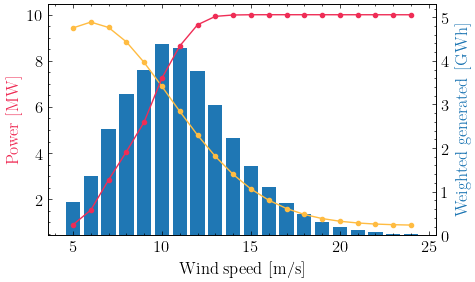

In [17]:
# Initialize the figure
fig, ax1 = plt.subplots(figsize=(5, 3))

# Plot Power on the primary y-axis (left)
line_1, = ax1.plot(wsps_BB, lines_BB['mean']/1E6, '-o', color='#EF2D56', label='Power curve', markersize=3)
ax1.set_xlabel('Wind speed [m/s]')
ax1.set_ylabel('Power [MW]', color='#EF2D56')

# Plot AEP on the right
ax2 = ax1.twinx()
line_2 = ax2.bar(wsps_BB, AEP_per_wsp_BB, color='tab:blue', label='Weighted power')
ax2.set_ylabel('Weighted generated [GWh]', color='tab:blue')
ax2.set_ylim(top=5.3)

# Plot wind probabilities
ax3 = ax1.twinx()
line_3, = ax3.plot(wsps_BB, P_wsp_BB, '-o', color='#FFBC42', label='Bin probabilities', markersize=3)
ax3.get_yaxis().set_visible(False)
ax3.set_ylim(top=0.11)

# Collect handles and labels for the legend
handles = [line_2, line_3, line_1]
labels = [h.get_label() for h in handles]

# Add a combined legend
# fig.legend(handles, labels, loc="center right", fontsize=12, bbox_to_anchor=(0.9, 0.5))

# Fix zorder
ax1.set_zorder(1)
ax1.patch.set_visible(False)

# plt.savefig(f'Plots/AEP_BB_{BB_SUBFOLDER}.pdf', dpi=300, bbox_inches='tight')
plt.show()